In [1]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import classification_report
import numpy as np
import ml
from sklearn.model_selection import train_test_split


In [3]:
MONGO_DB_URI = "mongodb://localhost:27017"
from dataset import getFeaturesFromDBData

df = getFeaturesFromDBData(MONGO_DB_URI)

User 21630333 (BOT) has no tweets in the database
User 22036045 (HUMAN) has no tweets in the database
User 22730529 (HUMAN) has no tweets in the database
User 23220415 (BOT) has no tweets in the database
User 23223395 (HUMAN) has no tweets in the database
User 23222867 (BOT) has no tweets in the database
User 23224336 (BOT) has no tweets in the database
User 23258087 (BOT) has no tweets in the database
User 23258968 (BOT) has no tweets in the database
User 25070587 (HUMAN) has no tweets in the database
User 23272942 (BOT) has no tweets in the database
User 24221453 (BOT) has no tweets in the database
User 31626280 (HUMAN) has no tweets in the database
User 25008627 (BOT) has no tweets in the database
User 25292754 (BOT) has no tweets in the database
User 33114252 (BOT) has no tweets in the database
User 37193429 (BOT) has no tweets in the database
User 37967468 (BOT) has no tweets in the database
User 43624887 (BOT) has no tweets in the database
User 49548467 (BOT) has no tweets in the

In [4]:
df


,has_bot_word_in_descriptionbot_word_in_description,has_bot_word_in_descriptionnot_bot_word_in_description,has_bot_word_in_namebot_word_in_name,has_bot_word_in_namenot_bot_word_in_name,has_bot_word_in_screen_namebot_word_in_screen_name,has_bot_word_in_screen_namenot_bot_word_in_screen_name,numbers_in_name,numbers_in_screen_name,user_description_length,user_followers_count,...,max_min_tweets_per_daymean,max_min_tweets_per_daymedian,max_min_tweets_per_daystd,max_min_tweets_per_dayskew,max_min_tweets_per_daykurtosis,max_min_tweets_per_dayentropy,max_occurence_of_same_gap,total_days,total_hours,label
0,0,1,0,1,0,1,0,0,29,746,...,0.681507,0.0,1.243311,3.110655,13.222448,4.467280,1,290,25099935.0,BOT
1,0,1,0,1,0,1,0,0,138,9427,...,33.166667,27.5,21.644219,0.515392,-1.201133,1.578478,6,4,406770.0,HUMAN
2,0,1,0,1,0,1,0,0,85,15697,...,4.444444,2.0,5.062084,2.032598,4.600113,3.272130,4,44,3830745.0,BOT
3,0,1,0,1,0,1,0,0,158,7389,...,0.523560,0.0,1.050166,3.660459,21.047465,4.588388,2,381,32982498.0,HUMAN
4,0,1,0,1,0,1,0,0,31,317,...,24.714286,27.0,10.845859,-1.230579,0.519567,1.799912,4,5,516548.0,BOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,1,0,1,0,1,0,0,42,116,...,0.206186,0.0,1.109826,7.514800,68.437147,3.004626,8,484,41854175.0,HUMAN
2396,0,1,0,1,0,1,0,0,0,5,...,0.073840,0.0,3.813379,51.882511,2689.862993,0.031612,6,2694,232800308.0,BOT
2397,0,1,0,1,0,1,0,0,11,21,...,0.840000,0.0,2.295735,3.734874,16.623612,2.899284,10,124,10735045.0,HUMAN
2398,0,1,0,1,0,1,0,1,0,13,...,4.326087,4.5,2.511317,0.147694,-0.688584,3.628717,3,44,3849687.0,BOT


In [5]:
df["label"] = df["label"].map({"HUMAN": 0, "BOT": 1}) 
#Map BOT label to 1 and Human label to 0
pprint(df.head())

   has_bot_word_in_descriptionbot_word_in_description  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   has_bot_word_in_descriptionnot_bot_word_in_description  \
0                                                  1        
1                                                  1        
2                                                  1        
3                                                  1        
4                                                  1        

   has_bot_word_in_namebot_word_in_name  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   has_bot_word_in_namenot_bot_

In [6]:
aaaa = (df.isnull().sum().sort_values())
aaaa.to_string()

'has_bot_word_in_descriptionbot_word_in_description        0\naverage_time_between_tweetsskew                           0\naverage_time_between_tweetskurtosis                       0\naverage_time_between_tweetsentropy                        0\nconsecutive_days_of_activity                              0\nconsecutive_days_of_no_activity                           0\nmax_min_tweets_per_daymin                                 0\nmax_min_tweets_per_daymax                                 0\nmax_min_tweets_per_daymean                                0\nmax_min_tweets_per_daymedian                              0\nmax_min_tweets_per_daystd                                 0\nmax_min_tweets_per_dayskew                                0\nmax_min_tweets_per_daykurtosis                            0\nmax_min_tweets_per_dayentropy                             0\nmax_occurence_of_same_gap                                 0\ntotal_days                                                0\naverage_time_between_tw

In [7]:
model, metrics = ml.randomForest(df)
pprint(metrics)

{'accuracy': 0.8375,
 'f1': 0.8321377331420372,
 'precision': 0.838150289017341,
 'recall': 0.8262108262108262}


In [13]:
Y = df.label.copy()
X = df.copy()
X = X.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
dfs = []
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
         # ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['BOT', 'HUMAN']
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    results.append(cv_results) 
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    
    dfs.append(this_df)
    
final = pd.concat(dfs, ignore_index=True)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogReg
              precision    recall  f1-score   support

         BOT       0.68      0.74      0.71       262
       HUMAN       0.66      0.59      0.62       218

    accuracy                           0.67       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.67      0.67      0.67       480

RF
              precision    recall  f1-score   support

         BOT       0.82      0.83      0.82       262
       HUMAN       0.79      0.78      0.78       218

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

KNN
              precision    recall  f1-score   support

         BOT       0.65      0.65      0.65       262
       HUMAN       0.58      0.58      0.58       218

    accuracy                           0.62       480
   macro avg       0.61      0.61      0.61       480
weighted avg       0.62      0.62      0.62       480

SVM
 

In [14]:
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.081736,0.007979,0.716146,0.718127,0.716146,0.716549,0.771173,LogReg
1,0.092079,0.006981,0.700521,0.706082,0.700521,0.699807,0.768002,LogReg
2,0.080931,0.006954,0.734375,0.742676,0.734375,0.732651,0.794356,LogReg
3,0.038196,0.008976,0.656250,0.657947,0.656250,0.654049,0.732946,LogReg
4,0.055831,0.007980,0.664062,0.670390,0.664062,0.660914,0.729899,LogReg
5,0.422540,0.027792,0.856771,0.856839,0.856771,0.856799,0.923879,RF
6,0.450410,0.029921,0.802083,0.802908,0.802083,0.802148,0.872579,RF
7,0.397652,0.028561,0.838542,0.839235,0.838542,0.838524,0.907950,RF
8,0.392232,0.028687,0.833333,0.834016,0.833333,0.833107,0.894948,RF
9,0.387277,0.028728,0.851562,0.855039,0.851562,0.851198,0.916124,RF


In [15]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

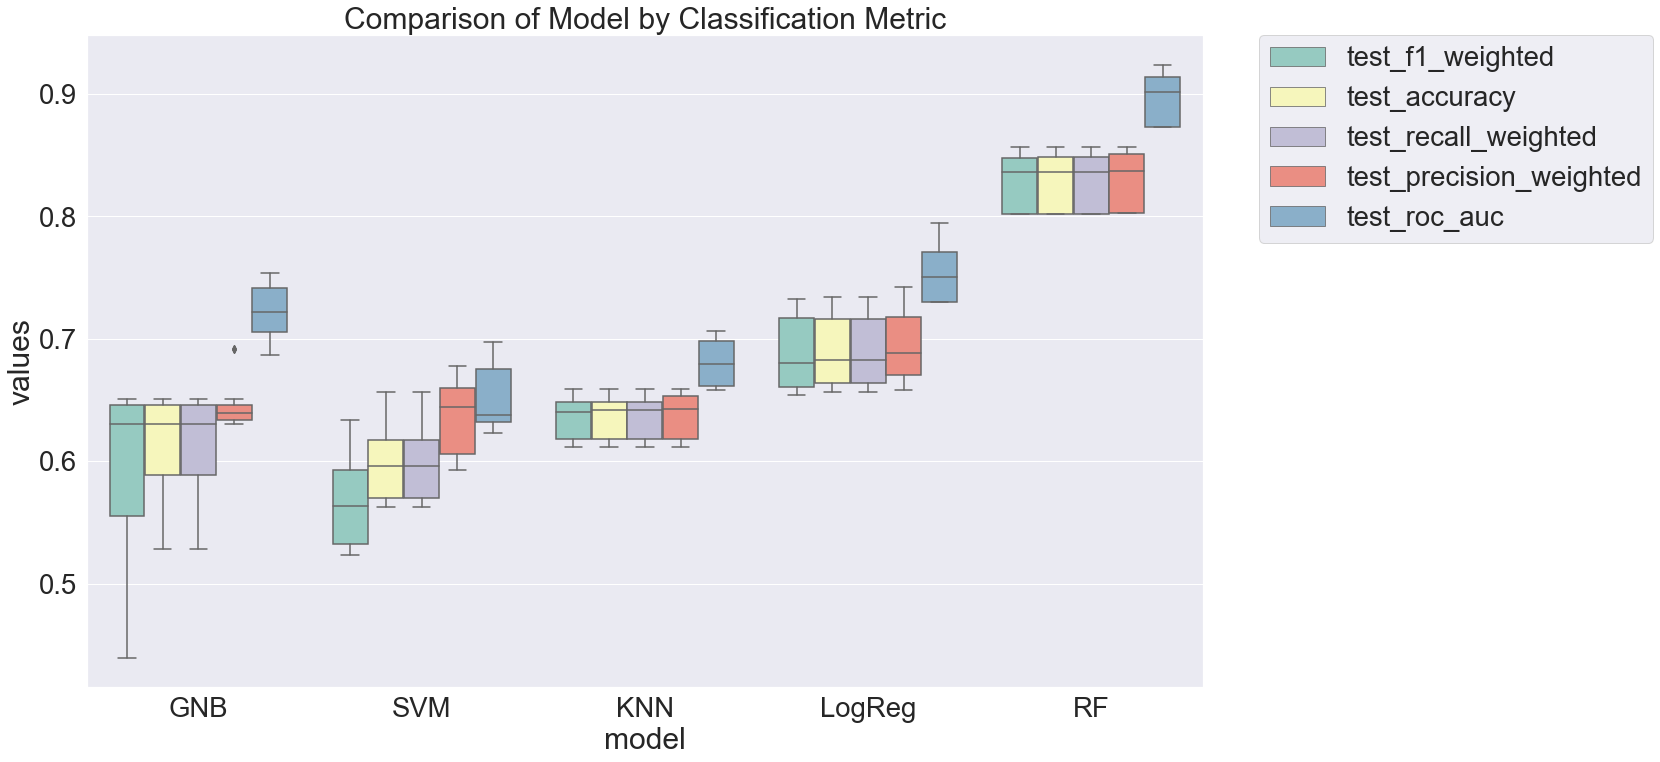

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [17]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy           test_precision_weighted            \
                 std      mean                     std      mean   
model                                                              
GNB         0.038223  0.615885                0.017830  0.644372   
KNN         0.016994  0.637066                0.017877  0.638259   
LogReg      0.030991  0.690017                0.031711  0.694657   
RF          0.020799  0.830903                0.020914  0.831808   
SVM         0.031826  0.600955                0.030068  0.638034   

       test_recall_weighted           test_roc_auc           test_f1_weighted  \
                        std      mean          std      mean              std   
model                                                                           
GNB                0.038223  0.615885     0.024803  0.719857         0.066070   
KNN                0.016994  0.637066     0.017603  0.680484         0.016656   
LogReg             0.030991  0.690017     0.025372  0.754692         0.031952   
RF                 0.020799  0.830903     0.019385  0.898211         0.020733   
SVM                0.031826  0.600955     0.026216  0.647933         0.037860   

                  
            mean  
model             
GNB     0.598165  
KNN     0.636438  
LogReg  0.688368  
RF      0.830841  
SVM     0.570041